In [36]:
import time
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
pwd()

'/media/notebooks/Final_Project'

In [37]:
#read sample from pickle file
with open('sample_1M_NoParse','rb') as fp:
    sample = pickle.load(fp)
len(sample)

1000000

In [38]:
# sample_df = pd.DataFrame(np.array(sample)) #command for creating df with already parsed file
start = time.time()
sample_df = pd.DataFrame(l.split('\t') for l in sample)
print("time taken to create df",time.time() - start)
print(sample_df.shape)
sample_df.head(5)

time taken to create df 14.912999868392944
(1000000, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,,1,25,3,122307,,,3,,...,3486227d,fa0643ee,21ddcdc9,5840adea,60f6221e,c9d4222a,32c7478e,43f13e8b,001f3601,731c3655
1,0,,-1,,,12814,54,3,0,30,...,07c540c4,395856b0,21ddcdc9,a458ea53,605305ee,,3a171ecb,f090fae7,001f3601,6c1aedfd
2,1,1,-1,28,16,53,13,17,28,769,...,8efede7f,5aed7436,083e89d9,b1252a9d,797fc211,,423fab69,cd361e60,e8b83407,3f2113d2
3,1,2,842,,1,34,1,2,4,4,...,07c540c4,4bcc9449,c584e779,a458ea53,03bd9e23,,32c7478e,8d9733ac,e8b83407,1d2c6cba
4,0,1,0,3,3,23,12,46,10,83,...,8efede7f,63aa00dd,,,424af181,ad3062eb,55dd3565,869caea3,,


In [39]:
#convert first 13 columsn to numeric
for i in range(0,14):
    sample_df[i] = pd.to_numeric(sample_df[i])

In [32]:
#percent NA by columns
l = len(sample_df)
l
print("column_number","percent_null","percent_non_zero")
for i in range(0,40):
    print(i,"\t\t",int(sample_df[i].isna().sum()*100/l),"\t\t",int(sample_df[i].dropna().nonzero()[0].shape[0]*100/l))
    
# print(sample_df[i].dropna().nonzero()[0].shape[0]) #counting non-zeros. nonzero returns a tuple of values and dtype (hence index 0 to correct for that), shape also returns a tuple

#print("try 1",sample_df[1].dropna().astype(bool).sum()*100/l) #anpther way of counting non-zeros.

column_number percent_null percent_non_zero
0 		 0 		 25
1 		 45 		 31
2 		 0 		 82
3 		 21 		 78
4 		 21 		 74
5 		 2 		 95
6 		 22 		 72
7 		 4 		 74
8 		 0 		 88
9 		 4 		 92
10 		 45 		 28
11 		 4 		 73
12 		 76 		 5
13 		 21 		 73
14 		 0 		 100
15 		 0 		 100
16 		 0 		 96
17 		 0 		 96
18 		 0 		 100
19 		 0 		 87
20 		 0 		 100
21 		 0 		 100
22 		 0 		 100
23 		 0 		 100
24 		 0 		 100
25 		 0 		 96
26 		 0 		 100
27 		 0 		 100
28 		 0 		 100
29 		 0 		 96
30 		 0 		 100
31 		 0 		 100
32 		 0 		 55
33 		 0 		 55
34 		 0 		 96
35 		 0 		 23
36 		 0 		 100
37 		 0 		 96
38 		 0 		 55
39 		 0 		 55


### Observations : 

Some variables are sparse. 1,12,35 are less than 50%. 12 is just 6%. 32-33 and 38-39 are exactly 56%.

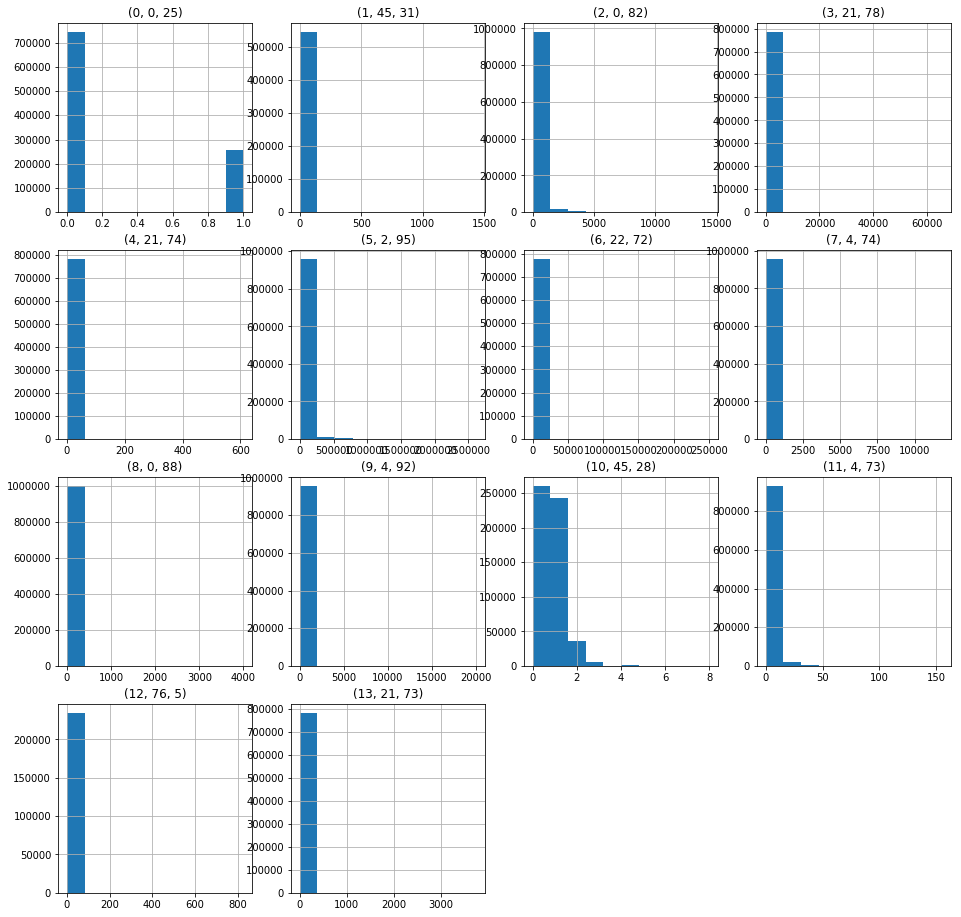

In [40]:
#Distribution of continuous variables

plt.figure(figsize=(16, 16))
for i in range(0,14):
    plt.subplot(4,4,i+1)
    plt.title(((i,int(sample_df[i].isna().sum()*100/l),int(sample_df[i].dropna().nonzero()[0].shape[0]*100/l))))
    sample_df[i].dropna().hist(range = (min(sample_df[i].dropna()),max(sample_df[i].dropna())),bins = 10)
plt.show()

In [34]:
#EDA categorical variables. Understanding number of categories

print("column","#categories","Min count","Max count")
for i in range(15,40):
    df_by_categ = sample_df[[0,i]].groupby([i]).agg({0:['count','mean']})
    print(i,"\t",len(df_by_categ),"\t\t",min(df_by_categ.iloc[:,0]),"\t",max(df_by_categ.iloc[:,0]))

column #categories Min count Max count
15 	 548 		 1 	 114605
16 	 361930 		 1 	 34069
17 	 140492 		 1 	 35895
18 	 274 		 1 	 670778
19 	 17 		 1 	 396154
20 	 11214 		 1 	 20854
21 	 569 		 1 	 594460
22 	 3 		 190 	 898877
23 	 31773 		 1 	 221844
24 	 4908 		 1 	 31776
25 	 322212 		 1 	 34069
26 	 3144 		 1 	 31776
27 	 26 		 10 	 349335
28 	 9459 		 1 	 14763
29 	 245972 		 1 	 34069
30 	 10 		 26 	 461644
31 	 4034 		 1 	 31578
32 	 1856 		 1 	 440668
33 	 4 		 183973 	 440668
34 	 290353 		 1 	 34069
35 	 15 		 1 	 763206
36 	 15 		 3 	 439595
37 	 45044 		 1 	 52363
38 	 72 		 1 	 440668
39 	 32492 		 1 	 440668


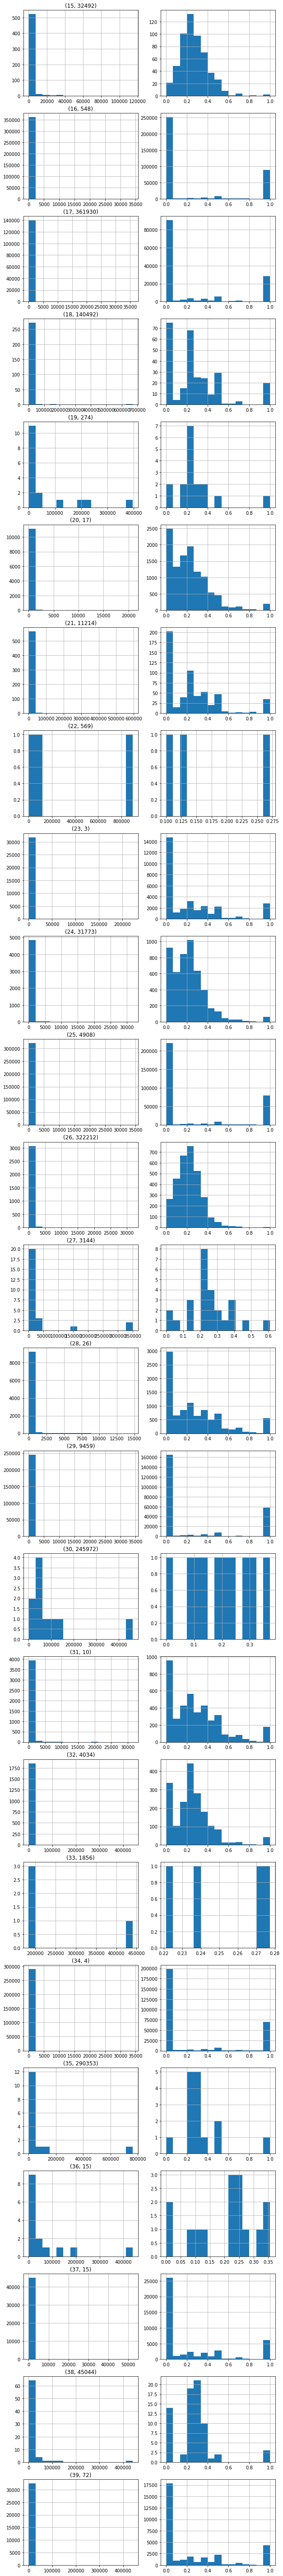

In [35]:
#Histogram of counts by categories, and distribution of mean probability by categories
plt.figure(figsize=(10, 104))
for i in range(15,40):
    plt.subplot(25,2,2*(i-14)-1)
    plt.title((i,len(df_by_categ)))
    df_by_categ = sample_df[[0,i]].groupby([i]).agg({0:['count','mean']})
    df_by_categ.iloc[:,0].hist(bins = 15)
    plt.subplot(25,2,2*(i-14))
    df_by_categ.iloc[:,1].hist(bins = 15)
plt.show()
plt.clf()
plt.cla()
plt.close()